# Exploración dataset imdb

Notebook inicial para explorar los dataset de películas de imdb. Han sido descargados de [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)

[imdb](https://www.imdb.com/interfaces/)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [68]:
!ls ./data

ratings.tsv titles.tsv


In [69]:
# Cargamos las puntuaciones y los títulos
df_ratings = pd.read_csv('./data/ratings.tsv', sep='\t')
df_titles = pd.read_csv('./data/titles.tsv', sep='\t')

/Users/antoniocantos/opt/anaconda3/envs/Master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
df_ratings.shape, df_titles.shape

((1174510, 3), (8138650, 9))

In [71]:
# Del dataset sólo borramos filas en el caso de que no tengan valoraciones.
df_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

Por lo tanto, nos quedamos con el dataset de ratings para más adelante cruzarlo con el dataset de títulos.

Ahora exploramos el dataset de títulos. Como vamos a ver, hay almacenadas, series, series de televisión, películas de televisión, etc.

In [72]:
df_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [73]:
# Comprobamos el tipo de títulos que tenemos
df_titles.titleType.value_counts()

tvEpisode       5958918
short            823864
movie            584114
video            316339
tvSeries         211941
tvMovie          132393
tvMiniSeries      38610
tvSpecial         33568
videoGame         28742
tvShort           10159
radioEpisode          1
radioSeries           1
Name: titleType, dtype: int64

In [74]:
# Nos quedamos sólo con movie
df_movies = df_titles[df_titles['titleType'] == 'movie'].copy()

In [75]:
df_movies.shape

(584114, 9)

In [76]:
# Como podemos observar, hemos reducido el dataset 7554536 filas.
df_titles.shape[0] - df_movies.shape[0]

7554536

In [77]:
# Comprobamos los valores nulos del dataset
df_movies.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

In [78]:
# Nos vamos a quedar con las columnas tconst, originalTitle, isAdult, startYear, runtimeMinutes y genres
df_movies.drop(['titleType', 'primaryTitle', 'endYear'], axis=1, inplace=True)

In [79]:
# Ahora vamos a realizar un merge entre los dos dataset que estamos trabajando, movies y ratings
df = df_movies.merge(df_ratings, on='tconst')

In [80]:
df.head()

,tconst,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000502,Bohemios,0,1905,100,\N,4.5,10
1,tt0000574,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.1,661
2,tt0000591,L'enfant prodigue,0,1907,90,Drama,5.2,10
3,tt0000615,Robbery Under Arms,0,1907,\N,Drama,4.5,16
4,tt0000630,Amleto,0,1908,\N,Drama,3.8,16


In [81]:
# Renombramos las columnas del nuevo dataset 
df.columns = ['id', 'title', 'is_adult', 'year', 'minutes', 'genres', 'average_rating', 'num_votes']

In [82]:
df.head()

,id,title,is_adult,year,minutes,genres,average_rating,num_votes
0,tt0000502,Bohemios,0,1905,100,\N,4.5,10
1,tt0000574,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",6.1,661
2,tt0000591,L'enfant prodigue,0,1907,90,Drama,5.2,10
3,tt0000615,Robbery Under Arms,0,1907,\N,Drama,4.5,16
4,tt0000630,Amleto,0,1908,\N,Drama,3.8,16


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266573 entries, 0 to 266572
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              266573 non-null  object 
 1   title           266573 non-null  object 
 2   is_adult        266573 non-null  object 
 3   year            266573 non-null  object 
 4   minutes         266573 non-null  object 
 5   genres          266573 non-null  object 
 6   average_rating  266573 non-null  float64
 7   num_votes       266573 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 18.3+ MB


Como podemos observar en la celda anterior, las columnas is_adult, year y minutes deberían de ser de tipo entero, pero en este caso sob de tipo objeto (string). Vamos a ver el motivo, además de realizar una limpieza de datos

In [84]:
df.is_adult.value_counts()

0    261661
1      4327
0       583
1         2
Name: is_adult, dtype: int64

In [85]:
# Transformamos todos los valores a enteros
df.is_adult = df.is_adult.astype(int)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266573 entries, 0 to 266572
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              266573 non-null  object 
 1   title           266573 non-null  object 
 2   is_adult        266573 non-null  int64  
 3   year            266573 non-null  object 
 4   minutes         266573 non-null  object 
 5   genres          266573 non-null  object 
 6   average_rating  266573 non-null  float64
 7   num_votes       266573 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


La columna is_adult ya es de  tipo entero. Continuamos por year

In [87]:
df.year.value_counts()

2017    9803
2018    9680
2016    9451
2019    9424
2015    9078
        ... 
2014       1
2019       1
1904       1
1896       1
1901       1
Name: year, Length: 215, dtype: int64

In [88]:
# El problema que nos encontramos, es que tienen algunas columnas con el valor \N
len(df[df.year == '\\N']), len(df)

(28, 266573)

In [89]:
# Como son sólo 28 filas, las borramos del dataset
df = df[df['year'] != '\\N']

In [90]:
len(df)

266545

In [91]:
df.year = df.year.astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266545 entries, 0 to 266572
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              266545 non-null  object 
 1   title           266545 non-null  object 
 2   is_adult        266545 non-null  int64  
 3   year            266545 non-null  int64  
 4   minutes         266545 non-null  object 
 5   genres          266545 non-null  object 
 6   average_rating  266545 non-null  float64
 7   num_votes       266545 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.3+ MB


Nos queda por último los minutos, que también tiene el problema de que tiene \N

In [93]:
len(df[df.minutes == '\\N'])

27128

En este caso tenemos 27128 filas con la columna minutos a \\N de 266545 filas. Vamos a ver cuál es la media y media de la columna para sustituirla por las filas donde tengan \\N

In [94]:
df[df.minutes != '\\N']['minutes'].astype(int).mean(), df[df.minutes != '\\N']['minutes'].astype(int).median()

(94.29620285944607, 91.0)

In [95]:
# Son muy similares, aplicamos la mediana al dataset
median = int(df[df.minutes != '\\N']['minutes'].astype(int).median())
df.minutes = df.minutes.apply(lambda x: int(x) if x != '\\N' else median)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266545 entries, 0 to 266572
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              266545 non-null  object 
 1   title           266545 non-null  object 
 2   is_adult        266545 non-null  int64  
 3   year            266545 non-null  int64  
 4   minutes         266545 non-null  int64  
 5   genres          266545 non-null  object 
 6   average_rating  266545 non-null  float64
 7   num_votes       266545 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 18.3+ MB


Una vez que tenemos los atributos cuantitativos limpios, vemos el resto de atributos cualitativos

In [97]:
df.genres.value_counts()

Drama                          45415
Documentary                    25837
Comedy                         23020
\N                             10176
Comedy,Drama                    8630
                               ...  
Documentary,News,Reality-TV        1
Musical,Sci-Fi,Thriller            1
Biography,Drama,Film-Noir          1
Action,Adult,Sci-Fi                1
Adult,Adventure,Mystery            1
Name: genres, Length: 1265, dtype: int64

In [98]:
df[df['genres'] == '\\N'].sort_values(by='num_votes', ascending=False)['num_votes']

254773    2076
254768    1594
254763    1132
254761    1025
169012     768
          ... 
102862       5
102479       5
102095       5
101158       5
266534       5
Name: num_votes, Length: 10176, dtype: int64

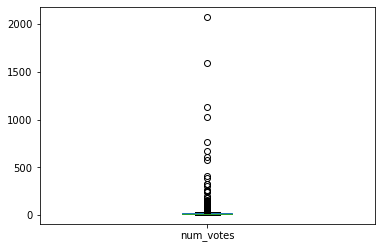

In [99]:
df[df['genres'] == '\\N'].sort_values(by='num_votes', ascending=False)['num_votes'].plot(kind='box');

In [100]:
df[df['genres'] == '\\N'].sort_values(by='num_votes', ascending=False)['num_votes'].describe()

count    10176.000000
mean        16.888660
std         36.249264
min          5.000000
25%          8.000000
50%         11.000000
75%         19.000000
max       2076.000000
Name: num_votes, dtype: float64

In [101]:
df[df['genres'] == '\\N'].sort_values(by='num_votes', ascending=False)['num_votes'].quantile(0.99)

70.25

Como podemos observar, el 99% de las películas tiene menos de 70 votos, teniendo en cuenta la página web más usada por usuarios como es imdb a nivel mundial, hace pensar que son películas muy poco conocidas y que seguramente es difícil de encontrar para verlas en la actualidad. Por lo tanto, se opta por borrar las todas las películas que no tienen género.

In [102]:
df = df[df['genres'] != '\\N']

In [103]:
df.shape

(256369, 8)

Borramos la columna is_adult ya que sólo hay 19 filas con el valor 1. De hecho, además de la columna, vamos a borrar las 19 filas ya que en el futuro chatbot no queremos recomendar a un posible usuario menor de 18 años una película para adultos

In [111]:
df.is_adult.value_counts()

0    34282
1       19
Name: is_adult, dtype: int64

In [112]:
df = df[df.is_adult != 1]
df.drop('is_adult', axis=1, inplace=True)
df.columns

Index(['id', 'title', 'year', 'minutes', 'genres', 'average_rating',
       'num_votes'],
      dtype='object')

A continuación comprobamos si hay alguna fila con el título a \\N

In [104]:
df[df.title == '\\N']

,id,title,is_adult,year,minutes,genres,average_rating,num_votes


Vemos que no existe ninguna, por lo tanto ya tenemos limpio el dataset, teniendo 256369 películas.

Vamos ahora a ver cómo están distribuidos el número de votaciones de las películas, ya que una película poco valorada por los usuarios, no estará en el dataset debido a que cuando se recomiende una película en el futuro chatbot, esta película se entiende que debería poder ser accesible al usuario o bien a través del alquilere o por alguna plataforma de streaming. Tener pocos votos hoy en día puede implicar que la películas es difícil de obtener por algunos de los medios comentados.

In [105]:
df.num_votes.describe().apply(lambda x: format(x, 'f'))

count     256369.000000
mean        3514.531780
std        33283.293103
min            5.000000
25%           17.000000
50%           59.000000
75%          298.000000
max      2429764.000000
Name: num_votes, dtype: object

Eliminamos las películas que tengan menos de 1000 votos, pero antes guardamos el dataset limpio

In [106]:
df.to_csv('./data/movies_clean.csv', index=False, header=True)

In [107]:
# Eliminamos del dataframe las películas con menos de 1000 votos
df = df[df['num_votes'] >= 1000]

In [113]:
df.shape

(34282, 7)

Ahora tenemos 34282 películas.

In [114]:
df.head()

,id,title,year,minutes,genres,average_rating,num_votes
56,tt0002130,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.1,2549
84,tt0002844,Fantômas - À l'ombre de la guillotine,1913,54,"Crime,Drama",7.0,2095
93,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1091
96,tt0003037,Juve contre Fantômas,1913,61,"Crime,Drama",7.0,1443
101,tt0003165,Le mort qui tue,1913,90,"Crime,Drama,Mystery",7.0,1126


### creación de nuevas columnas en el dataset

Se van a crear una serie de columnas para segmentar un poco más los datos.

1. Creación de una nueva columna llamada epoca (época), en la cual tendrá tres posibles valores:
    - Actual, desde el año 2000 hasta hoy
    - Intermedio, desde el año 1970 hasta 1999
    - Clásica, desde 1900 hasta 1969
2. Creación de una nueva columna llamada duración, en la cual tendrá tres posibles valores:
    - Corta, con un máximo de 90 minutos
    - Normal, entre 91 y 120 minutos
    - Larga, desde 121 minutos en adelante.
3. División de los géneros en tres subcategorias. En el caso de que una película tenga en la columna genres un sólo género, el resto se pondrá unknown.
    - genre_1
    - genre_2
    - genre_3
4. La última columna a crear indicará si la película es:
    - Conocida
    - Normal
    - Poco conocida

In [117]:
def set_time(year):
    if year <= 1969:
        return 'Classic'
    elif year > 1969 and year < 2000:
        return 'Middle'
    else:
        return 'Current'

df['time'] = df.year.apply(set_time)

In [118]:
df.head()

,id,title,year,minutes,genres,average_rating,num_votes,time
56,tt0002130,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.1,2549,Classic
84,tt0002844,Fantômas - À l'ombre de la guillotine,1913,54,"Crime,Drama",7.0,2095,Classic
93,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1091,Classic
96,tt0003037,Juve contre Fantômas,1913,61,"Crime,Drama",7.0,1443,Classic
101,tt0003165,Le mort qui tue,1913,90,"Crime,Drama,Mystery",7.0,1126,Classic


In [120]:
# Creación de la columna duración (length)

def set_length(minutes):
    if minutes <= 90:
        return 'Short'
    elif minutes > 90 and minutes <= 120:
        return 'Normal'
    else:
        return 'Long'
    
df['length'] = df.minutes.apply(set_length)

In [121]:
df.head()

,id,title,year,minutes,genres,average_rating,num_votes,time,length
56,tt0002130,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.1,2549,Classic,Short
84,tt0002844,Fantômas - À l'ombre de la guillotine,1913,54,"Crime,Drama",7.0,2095,Classic,Short
93,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1091,Classic,Normal
96,tt0003037,Juve contre Fantômas,1913,61,"Crime,Drama",7.0,1443,Classic,Short
101,tt0003165,Le mort qui tue,1913,90,"Crime,Drama,Mystery",7.0,1126,Classic,Short


In [127]:
df['num_votes'].describe().apply(lambda x: format(x, 'f'))

count      34282.000000
mean       25461.156321
std        87910.020283
min         1000.000000
25%         1688.000000
50%         3438.000000
75%        11612.000000
max      2429764.000000
Name: num_votes, dtype: object

In [128]:
# Decimos que menos de 2000 votos la película no es conocida. Entre 2000 y 10000 normal. y por encima de 1000 votos
# la película es conocida
def film_known(votes):
    if(votes <= 2000):
        return 'Unknown'
    elif votes < 10000:
        return 'Normal'
    else:
        return 'Known'
    
df['known'] = df.num_votes.apply(film_known)

In [129]:
df.head()

,id,title,year,minutes,genres,average_rating,num_votes,time,length,known
56,tt0002130,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.1,2549,Classic,Short,Normal
84,tt0002844,Fantômas - À l'ombre de la guillotine,1913,54,"Crime,Drama",7.0,2095,Classic,Short,Normal
93,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1091,Classic,Normal,Unknown
96,tt0003037,Juve contre Fantômas,1913,61,"Crime,Drama",7.0,1443,Classic,Short,Unknown
101,tt0003165,Le mort qui tue,1913,90,"Crime,Drama,Mystery",7.0,1126,Classic,Short,Unknown


In [137]:
# Generamos una tupla de tres elementos para el género
    
df['genre_1'] = df.genres.apply(lambda x: x.split(',')[0])
df['genre_2'] = df.genres.apply(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else 'Unknown')
df['genre_3'] = df.genres.apply(lambda x: x.split(',')[2] if len(x.split(',')) > 2 else 'Unknown')

In [138]:
df.head()

,id,title,year,minutes,genres,average_rating,num_votes,time,length,known,genre_1,genre_2,genre_3
56,tt0002130,L'Inferno,1911,71,"Adventure,Drama,Fantasy",7.1,2549,Classic,Short,Normal,Adventure,Drama,Fantasy
84,tt0002844,Fantômas - À l'ombre de la guillotine,1913,54,"Crime,Drama",7.0,2095,Classic,Short,Normal,Crime,Drama,Unknown
93,tt0003014,Ingeborg Holm,1913,96,Drama,7.0,1091,Classic,Normal,Unknown,Drama,Unknown,Unknown
96,tt0003037,Juve contre Fantômas,1913,61,"Crime,Drama",7.0,1443,Classic,Short,Unknown,Crime,Drama,Unknown
101,tt0003165,Le mort qui tue,1913,90,"Crime,Drama,Mystery",7.0,1126,Classic,Short,Unknown,Crime,Drama,Mystery


Guardamos el dataset con las nuevas columnas en un fichero csv


In [141]:
df.to_csv('./data/movies_new_columns.csv', header=True, index=False)

In [143]:
df[df.title == 'Inception']

,id,title,year,minutes,genres,average_rating,num_votes,time,length,known,genre_1,genre_2,genre_3
167823,tt1375666,Inception,2010,148,"Action,Adventure,Sci-Fi",8.8,2141232,Current,Long,Known,Action,Adventure,Sci-Fi
